In [23]:
import numpy as np
import visualkeras as vk 
import pandas as pd
import seaborn as sn

from tensorflow.keras.utils import plot_model
from keras.models import Sequential, load_model
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Activation, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

In [24]:
train_data = np.load("../datasets/MNIST/train_data.npy")
test_data = np.load("../datasets/MNIST/test_data.npy")
train_labels = np.load("../datasets/MNIST/train_labels.npy")
test_labels = np.load("../datasets/MNIST/test_labels.npy")

In [29]:
model = Sequential()

# feature extraction
model.add(Conv2D(filters=32, kernel_size = 3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size = 3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size = 3, activation='relu', padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# classification
model.add(Flatten())

model.add(Dense(64, activation='relu',))
model.add(Dense(128, activation='relu',))

model.add(Dense(36, activation='softmax',))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

In [ ]:
plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)

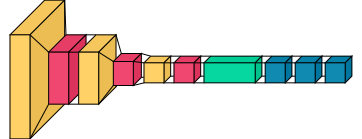

In [30]:
vk.layered_view(model)

In [31]:
best_loss_checkpoint = ModelCheckpoint(
    filepath="../datasets/MNIST/models/cnn-arct/best_loss_model.h5",
    monitor="loss",
    save_best_only=True,
    save_weights_only=False,
    mode="min"
)

best_val_loss_checkpoint = ModelCheckpoint(
    filepath="../datasets/MNIST/models/cnn-arct/best_val_loss_model.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=False,
    mode="min"
)

In [32]:
history = model.fit(
    train_data,
    train_labels,
    validation_data=(test_data, test_labels), 
    epochs=10, 
    batch_size=200, 
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/10
1770/1770 [==============================] - 22s 8ms/step - loss: 0.3136 - accuracy: 0.9119 - val_loss: 0.1330 - val_accuracy: 0.9611
Epoch 2/10
1770/1770 [==============================] - 15s 9ms/step - loss: 0.1160 - accuracy: 0.9663 - val_loss: 0.0989 - val_accuracy: 0.9714
Epoch 3/10
1770/1770 [==============================] - 15s 8ms/step - loss: 0.0897 - accuracy: 0.9736 - val_loss: 0.0852 - val_accuracy: 0.9754
Epoch 4/10
1770/1770 [==============================] - 14s 8ms/step - loss: 0.0752 - accuracy: 0.9777 - val_loss: 0.0729 - val_accuracy: 0.9789
Epoch 5/10
1770/1770 [==============================] - 14s 8ms/step - loss: 0.0631 - accuracy: 0.9810 - val_loss: 0.0705 - val_accuracy: 0.9794
Epoch 6/10
1770/1770 [==============================] - 15s 8ms/step - loss: 0.0535 - accuracy: 0.9837 - val_loss: 0.0590 - val_accuracy: 0.9823
Epoch 7/10
1770/1770 [==============================] - 15s 9ms/step - loss: 0.0457 - accuracy: 0.9858 - val_loss: 0.0613 - val_ac

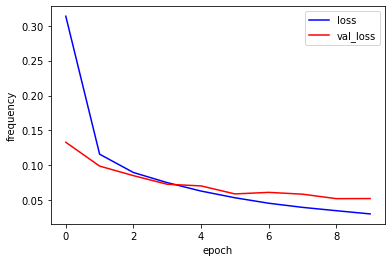

In [33]:
plt.plot(history.history["loss"], 'b', label="loss")
plt.plot(history.history["val_loss"], 'r', label="val_loss")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

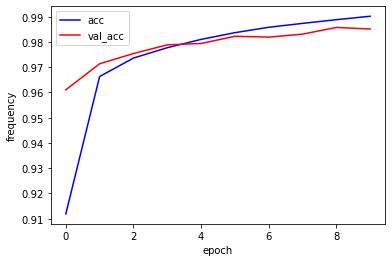

In [34]:
plt.plot(history.history["accuracy"], 'b', label="acc")
plt.plot(history.history["val_accuracy"], 'r', label="val_acc")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

In [35]:
model.load_weights("../datasets/MNIST/models/cnn-arct/best_val_loss_model.h5")

loss, acc = model.evaluate(test_data, test_labels)

print('accuracy: {:5.4f}%'.format(100 * acc))
print('val_loss: {:5.4f}%'.format(100 * loss))

2766/2766 [==============================] - 9s 3ms/step - loss: 0.0523 - accuracy: 0.9858
accuracy: 98.5761%
val_loss: 5.2262%


In [36]:
predictions = model.predict(test_data)

<AxesSubplot:xlabel='predicted', ylabel='actual'>

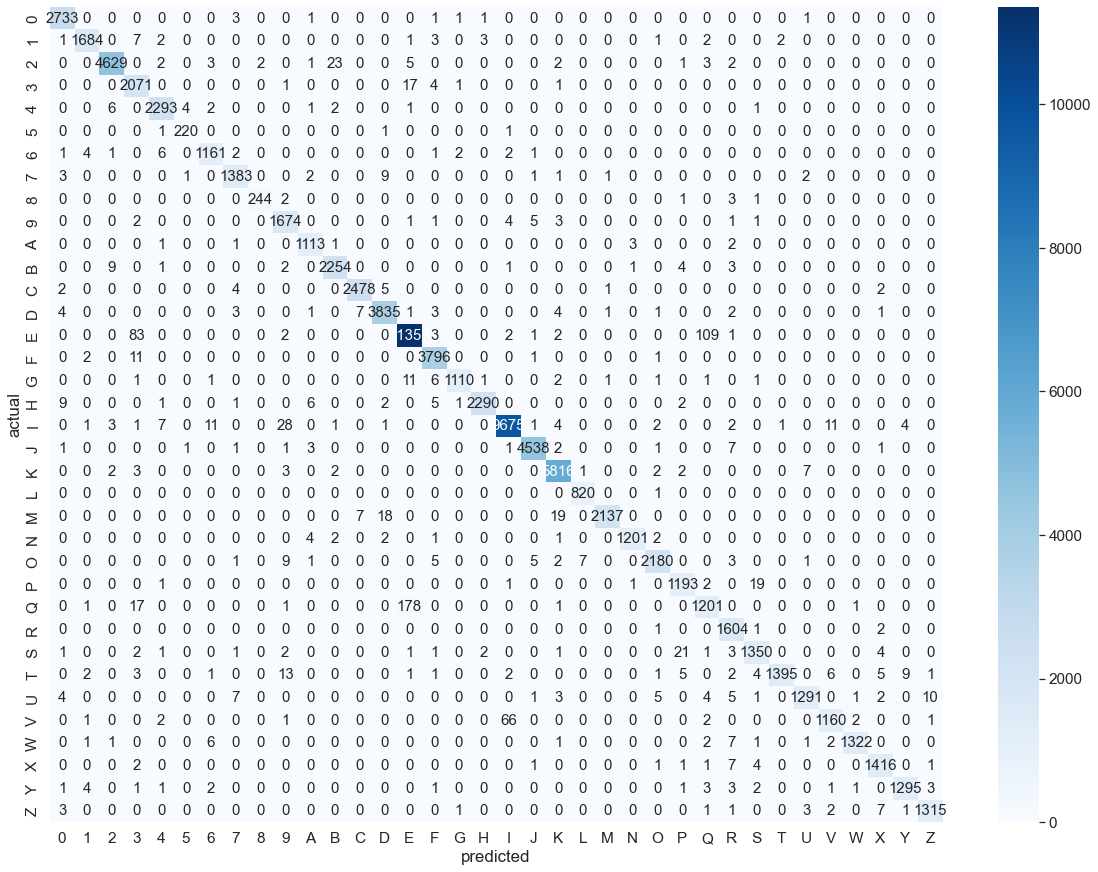

In [38]:
confusion = confusion_matrix(
    np.argmax(test_labels, axis=1),
    np.argmax(predictions, axis=1)
)

labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (20,15))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 15}, fmt="d")

# How to interprete a confusion matrics

In [39]:
#model.save("../-eng-alphanum/saved_model/cnn-arct-model.h5")